#### ML Modeling

In [1]:
import pandas as pd

# 사용할 모델
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from freeman.plt_setting import plt_settings
from freeman.evaluation import regression_evaluation, f_importances, plot_actual_pred
from freeman.aiddd.data_manager import read_data

plt_settings()

In [2]:
df_X = read_data('2a-all-scaled-X2', process_seq='4th')
df_y = read_data('2a-all-y2', process_seq='4th')

In [3]:
training_columns = df_X.columns

X_train, X_test, y_train, y_test = \
    train_test_split(df_X, df_y, test_size=0.2)
    
X_test_copy = X_test.copy()

In [4]:
SEED = 123
ml_models = {
    'LIN': LinearRegression(),
    'LASSO': Lasso(),
    'RIDGE': Ridge(),
    'KNR': KNeighborsRegressor(),
    'DTR': DecisionTreeRegressor(),
    'RFR': RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=SEED),
    'GBR': GradientBoostingRegressor(),
    'EN': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=SEED),
    'XGR': XGBRegressor(eta=0.01, n_estimators=100, n_jobs=-1),
}

In [5]:
def diff_ytest_pred(model_key, test, pred):
    test = test['total_cons_cost'].values.tolist()
    pred = pred.tolist()
    if isinstance(pred[0], list):
        pred = [item for sub in pred for item in sub]
    max_test = max(test)
    loop_size = len(test)
    result_mape = []
    result_max_mape = []
    for idx in range(loop_size):
        new_mape = abs((test[idx] - pred[idx])/test[idx])*100
        new_max_mape = abs((test[idx] - pred[idx])/(test[idx]+max_test))*100
        result_mape.append(new_mape)
        result_max_mape.append(new_max_mape)
    X_test_copy[f'{model_key}_mape'] = result_mape
    X_test_copy[f'{model_key}_max_mape'] = result_max_mape

In [6]:
def model_fit_and_evaluation(model_key, display_start=0, display_size=50):
    model = ml_models[model_key]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f'Evaluation: {model_key}')
    evaluation_value = regression_evaluation(y_test, predictions)
    evaluation_values.append(evaluation_value)
    model_names.append(model_key)
    diff_ytest_pred(model_key, y_test, predictions)
    try:
        f_importances(model, training_columns, model_key)
    except AttributeError as e:
        print(f'`{model_key}` object has no attribute `feature_importances_`')
    plot_actual_pred(
        y_test[display_start:display_start+display_size],
        predictions[display_start:display_start+display_size],
        model_key
    )

Evaluation: LIN
R2_SCORE: -9469255512397197312.000000, MAPE: 4396397732.051663, MSE: 114684233916647706887705472270336.000000, RMSE: 10709072504967352.000000, MAE: 425074463019744.875000
`LIN` object has no attribute `feature_importances_`


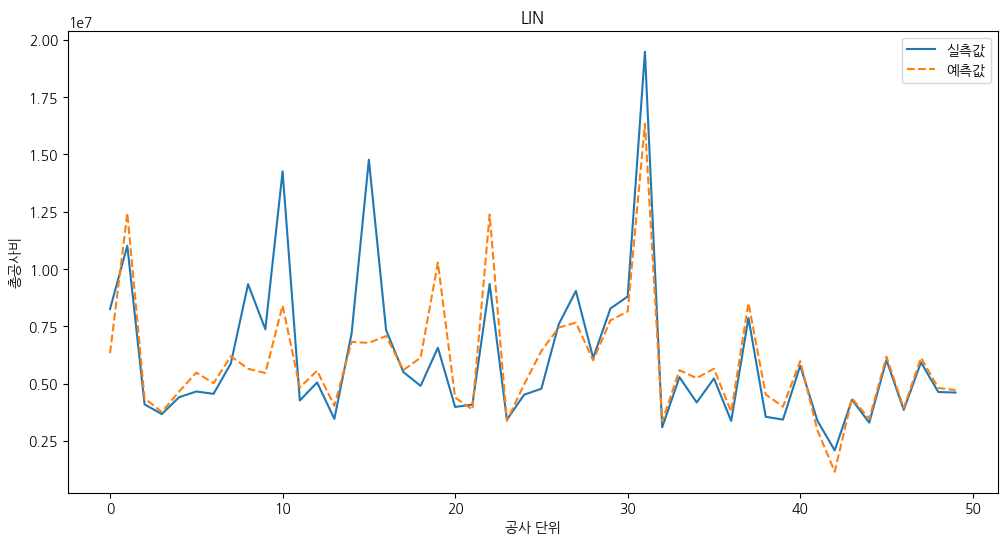

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.147e+15, tolerance: 3.898e+12
  model = cd_fast.enet_coordinate_descent(


Evaluation: LASSO
R2_SCORE: 0.680399, MAPE: 14.690170, MSE: 3870760380523.270996, RMSE: 1967424.809370, MAE: 1012036.149690
`LASSO` object has no attribute `feature_importances_`


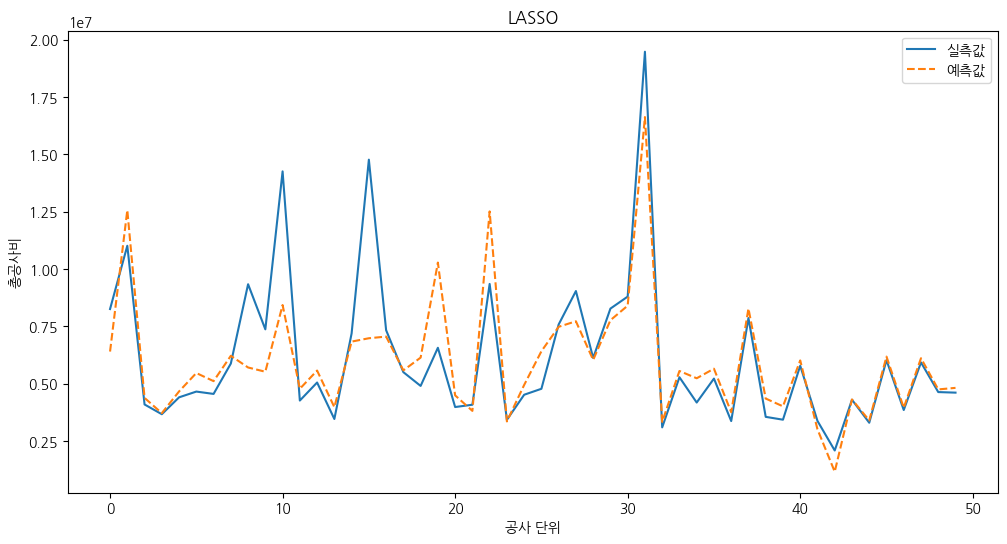

Evaluation: RIDGE
R2_SCORE: 0.700635, MAPE: 14.635443, MSE: 3625670236508.959961, RMSE: 1904119.281061, MAE: 1005345.182505
`RIDGE` object has no attribute `feature_importances_`


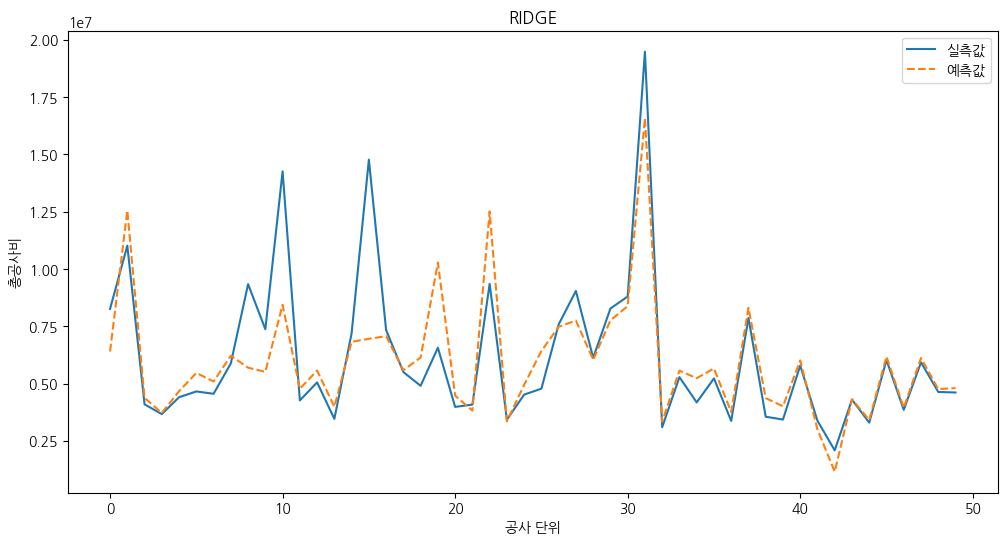

Evaluation: KNR
R2_SCORE: 0.572490, MAPE: 16.824178, MSE: 5177664366493.468750, RMSE: 2275448.168272, MAE: 1200681.727363
`KNR` object has no attribute `feature_importances_`


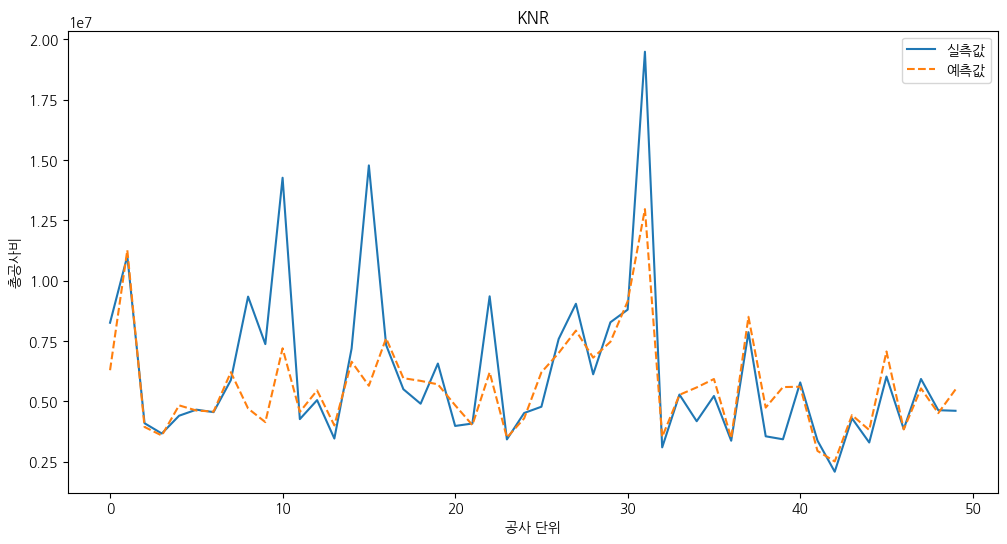

Evaluation: DTR
R2_SCORE: 0.386907, MAPE: 21.536206, MSE: 7425308874174.843750, RMSE: 2724941.994644, MAE: 1428700.517413


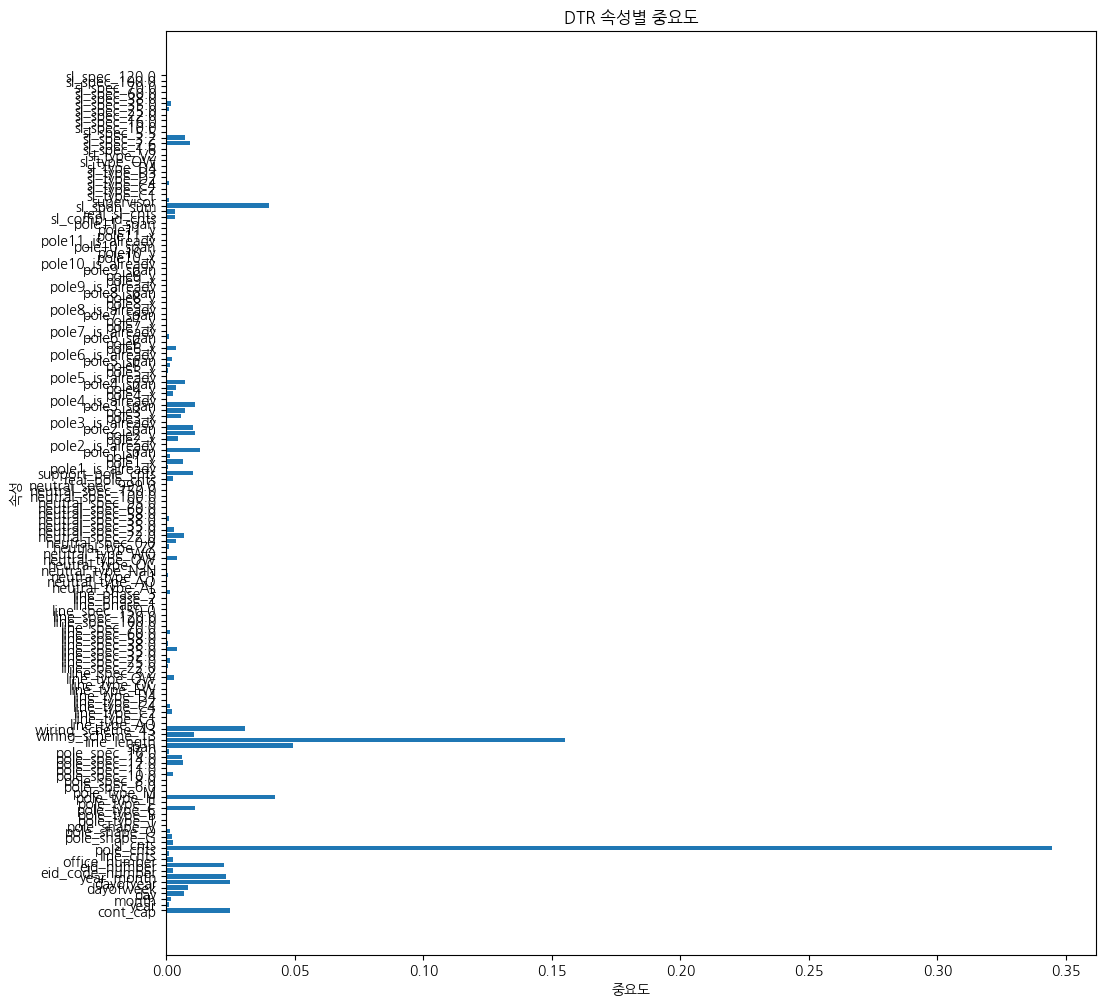

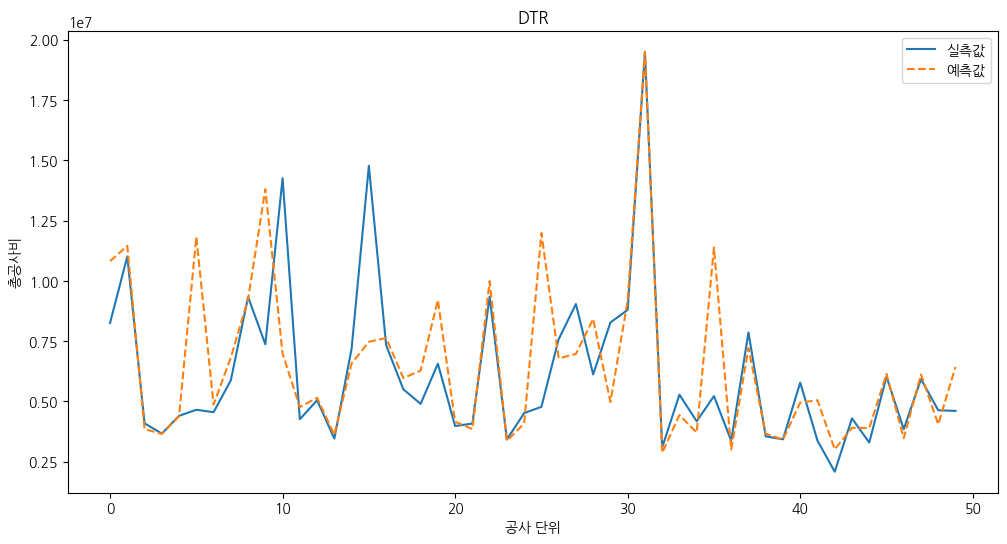

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Evaluation: RFR
R2_SCORE: 0.717712, MAPE: 14.840718, MSE: 3418847991411.722656, RMSE: 1849012.707207, MAE: 994866.614664


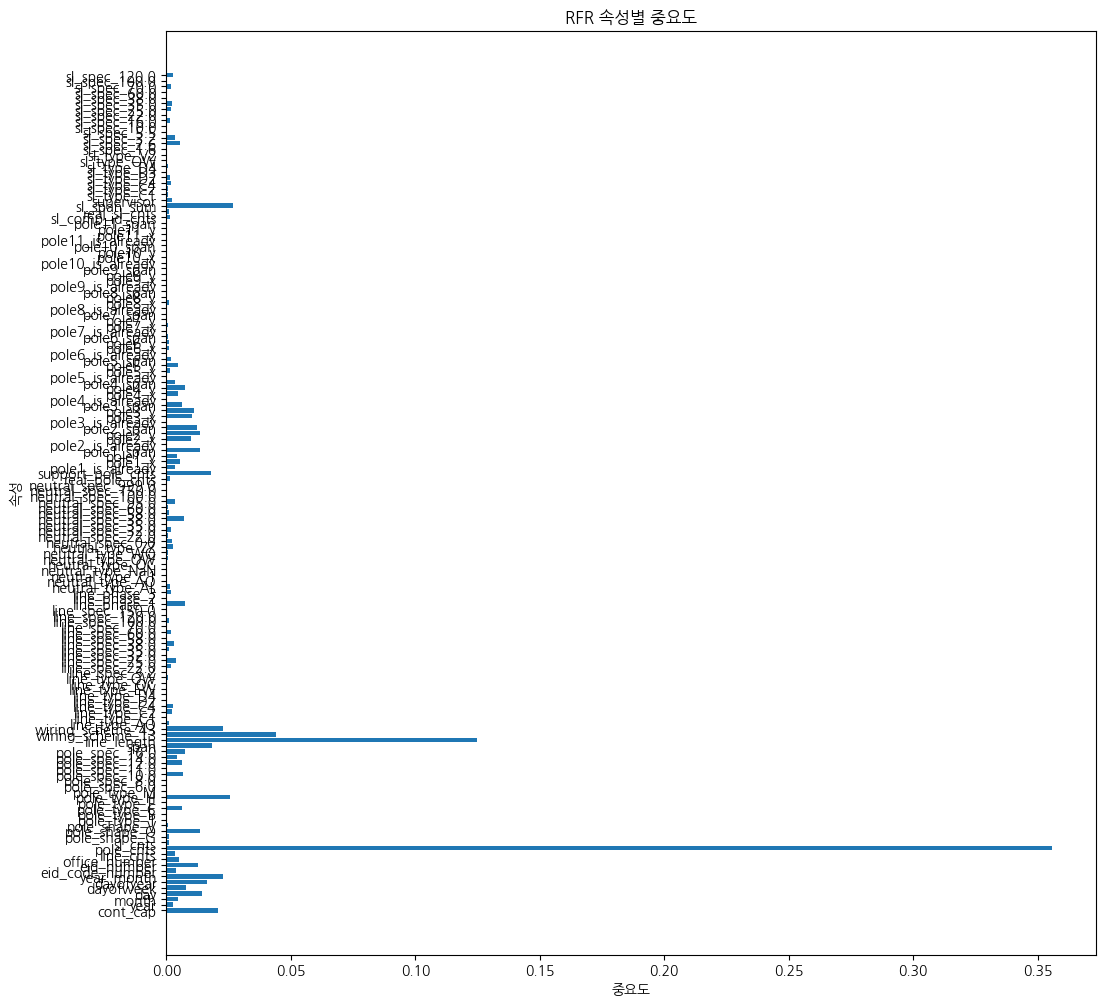

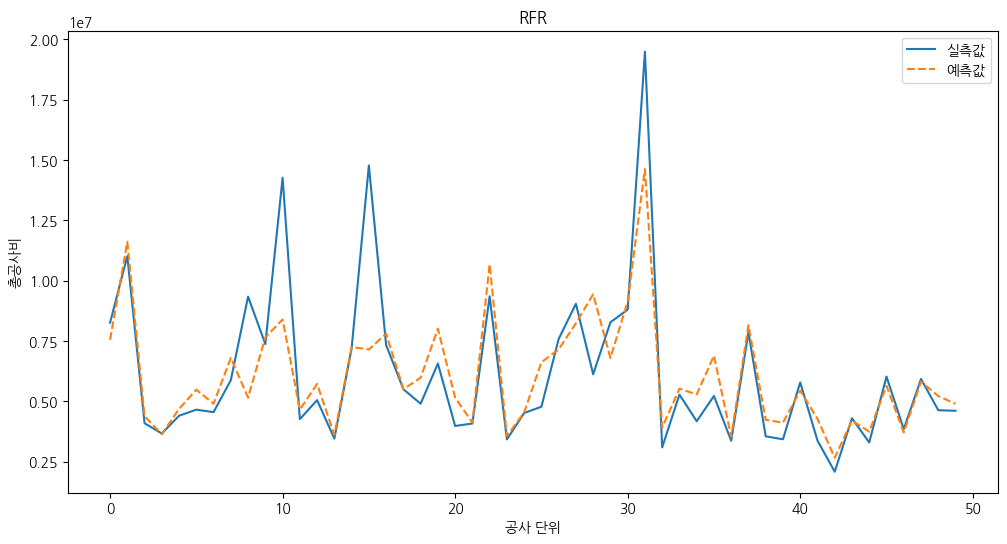

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Evaluation: GBR
R2_SCORE: 0.746234, MAPE: 13.766318, MSE: 3073413769748.590332, RMSE: 1753115.446783, MAE: 935169.167355


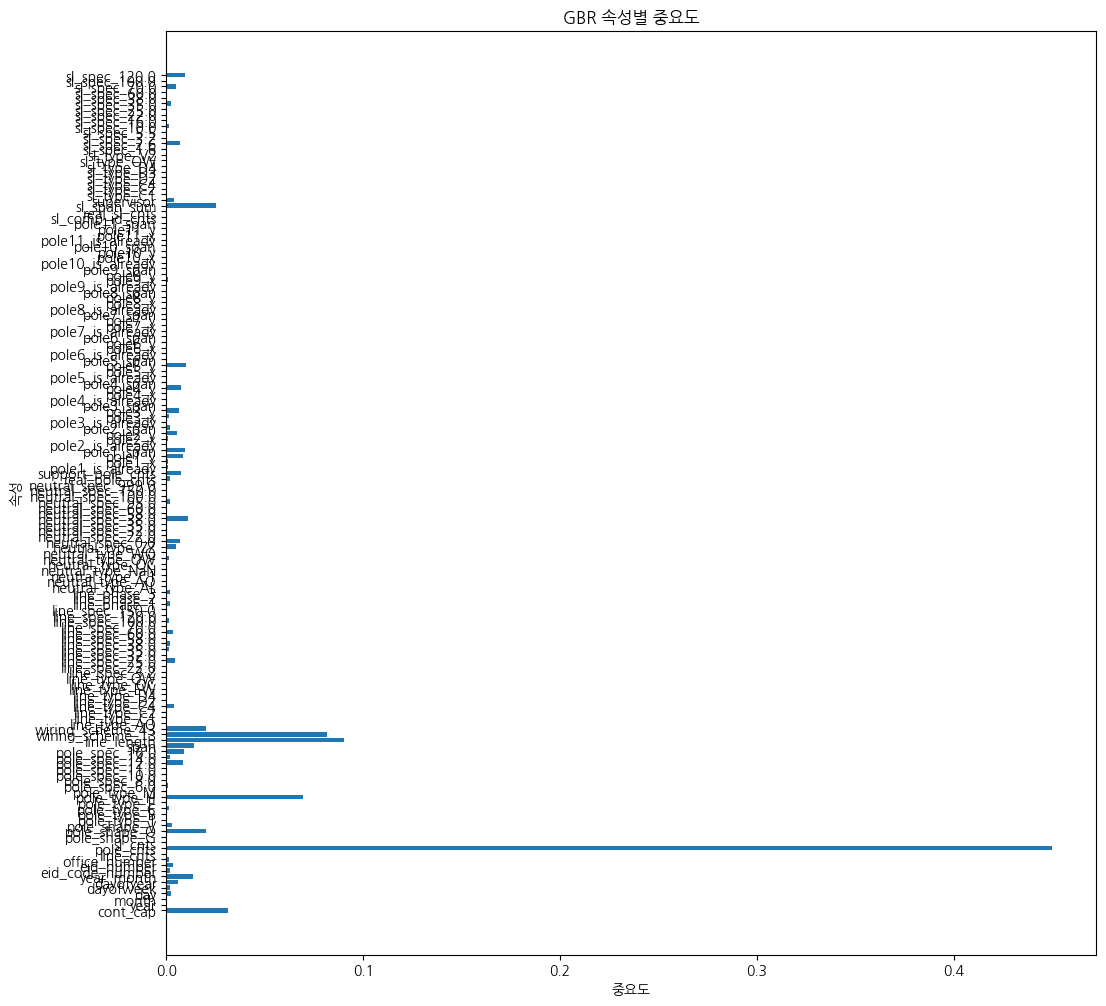

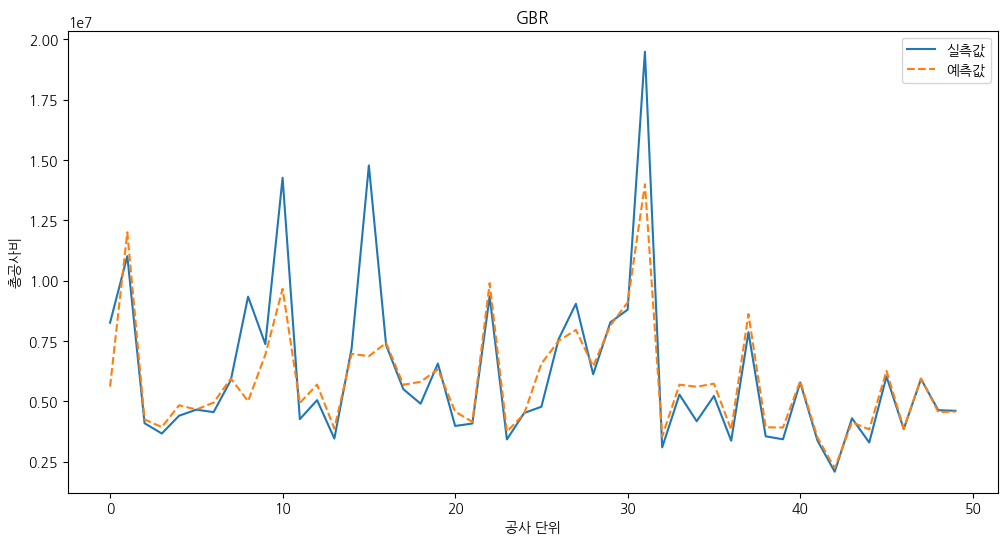

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.456e+15, tolerance: 3.898e+12
  model = cd_fast.enet_coordinate_descent(


Evaluation: EN
R2_SCORE: 0.747410, MAPE: 14.409780, MSE: 3059173908224.426758, RMSE: 1749049.429897, MAE: 972477.506164
`EN` object has no attribute `feature_importances_`


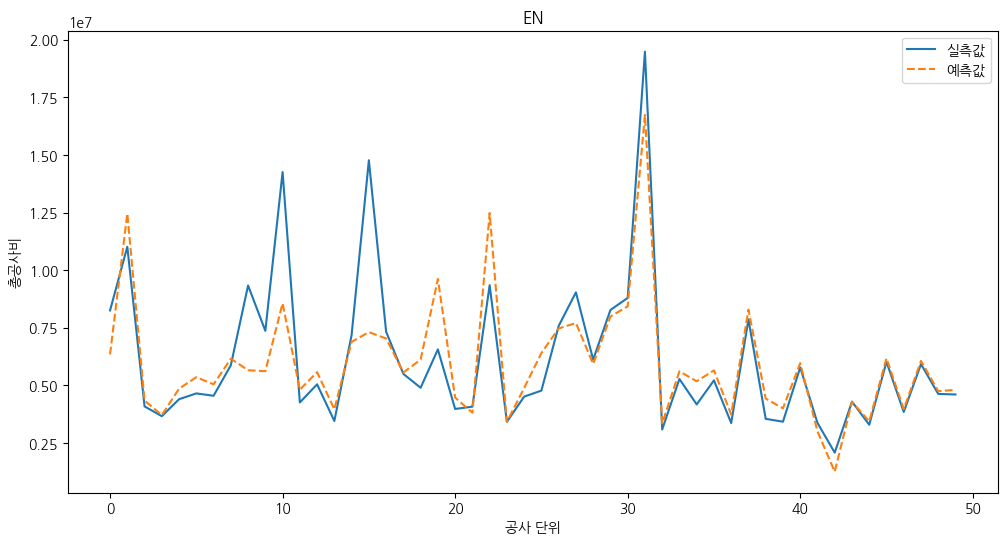

Evaluation: XGR
R2_SCORE: 0.090587, MAPE: 34.470903, MSE: 11014098178704.093750, RMSE: 3318749.490200, MAE: 2387457.007152


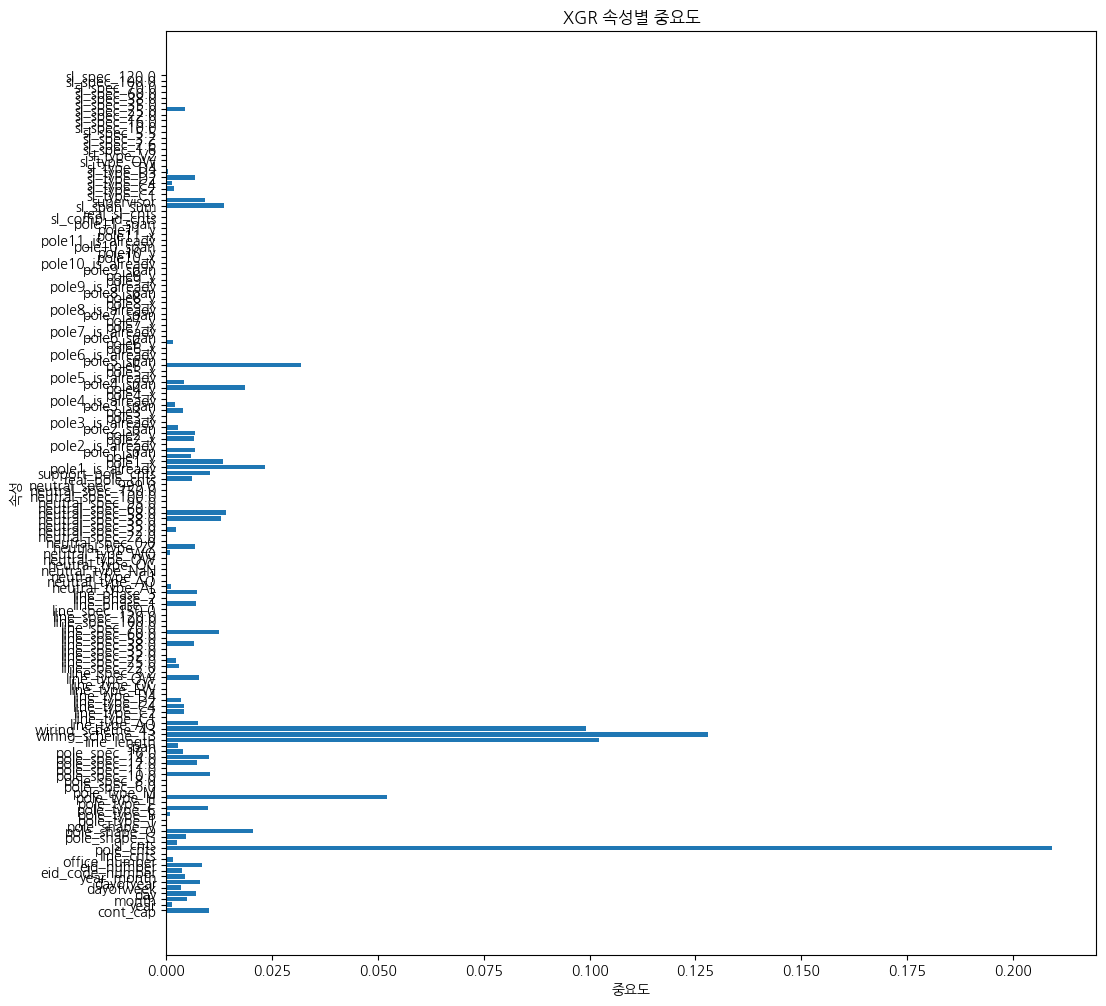

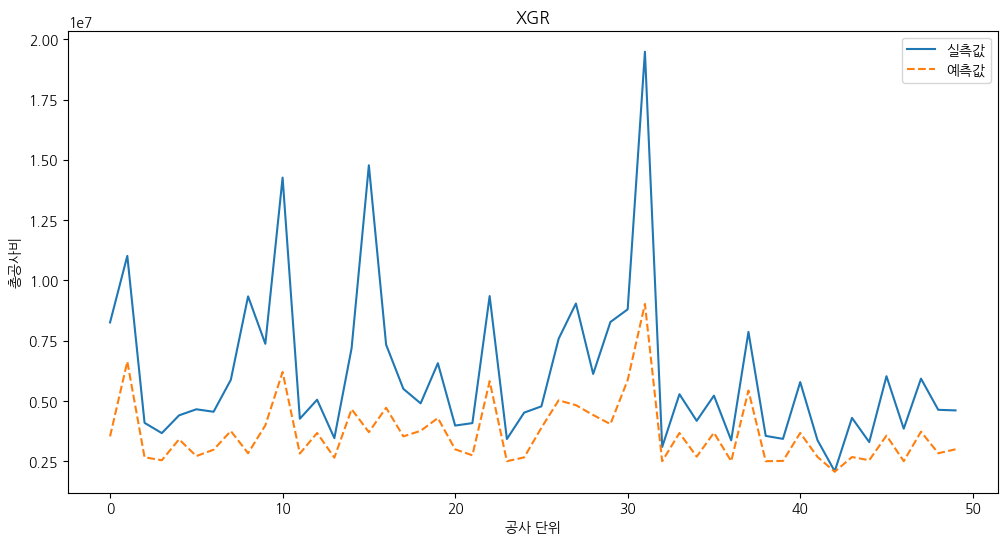

In [7]:
evaluation_values = []
model_names = []
column_names = ['r2score', 'mape', 'mse', 'rmse', 'mae']
for _model_key in ml_models.keys():
    model_fit_and_evaluation(_model_key, display_start=50, display_size=50)
    
df_evaluation = pd.DataFrame(
    evaluation_values, columns=column_names, index=model_names
)

In [8]:
df_evaluation

,r2score,mape,mse,rmse,mae
LIN,-9.469256e+18,4.396398e+07,1.146842e+32,1.070907e+16,4.250745e+14
LASSO,6.803988e-01,1.469017e-01,3.870760e+12,1.967425e+06,1.012036e+06
RIDGE,7.006354e-01,1.463544e-01,3.625670e+12,1.904119e+06,1.005345e+06
KNR,5.724903e-01,1.682418e-01,5.177664e+12,2.275448e+06,1.200682e+06
DTR,3.869066e-01,2.153621e-01,7.425309e+12,2.724942e+06,1.428701e+06
RFR,7.177123e-01,1.484072e-01,3.418848e+12,1.849013e+06,9.948666e+05
GBR,7.462342e-01,1.376632e-01,3.073414e+12,1.753115e+06,9.351692e+05
EN,7.474099e-01,1.440978e-01,3.059174e+12,1.749049e+06,9.724775e+05
XGR,9.058720e-02,3.447090e-01,1.101410e+13,3.318749e+06,2.387457e+06
